In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output

import time, json
from datetime import date

import time
import math
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
df= pd.read_csv('groupeddf.csv')
df4=df.set_index("Code")

In [3]:
uniqueVals = df["Code"].unique()  


In [4]:
uniqueVals

array(['3IINFOTECH', '8KMILES', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABIRLANUVO',
       'ACC', 'ADANIENT', 'ADANIPORTS', 'ADANIPOWER', 'AHMEDFORGE',
       'AIAENG', 'AIL', 'AJANTPHARM', 'AKZOINDIA', 'ALBK', 'ALEMBICLTD',
       'ALLCARGO', 'ALOKTEXT', 'AMARAJABAT', 'AMBUJACEM', 'AMTEKAUTO',
       'AMTEKINDIA', 'ANANTRAJ', 'ANDHRABANK', 'APLLTD', 'APOLLOHOSP',
       'APOLLOTYRE', 'ARCOTECH', 'ARVIND', 'ARVINDREM', 'ASHOKA',
       'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ASTRAMICRO', 'ATFL',
       'ATULAUTO', 'AURIONPRO', 'AUROPHARMA', 'AXISBANK', 'AXISCADES',
       'BAJAJCORP', 'BAJAJELEC', 'BAJAJFINSV', 'BAJAJHIND', 'BAJAJHLDNG',
       'BAJFINANCE', 'BALKRISIND', 'BALMLAWRIE', 'BALRAMCHIN',
       'BANKBARODA', 'BANKINDIA', 'BATAINDIA', 'BAYERCROP', 'BBL', 'BBTC',
       'BEL', 'BEML', 'BERGEPAINT', 'BFUTILITIE', 'BGRENERGY',
       'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BLUEDART',
       'BOMDYEING', 'BOSCHLTD', 'BPCL', 'BPL', 'BRITANNIA', 'CADILAHC',
       'CAIRN', 'CANBK', 'CA

In [5]:
grouped_df=pd.DataFrame()
for i in uniqueVals:
    df5 = (df4.loc[i,:]).groupby(['Code','Date']).mean()
    # store DataFrame in list
    grouped_df=grouped_df.append(df5)
grouped_df.reset_index()
del df5

In [6]:
#'3IINFOTECH', '8KMILES', 'ABAN'

df1=grouped_df.loc["8KMILES",:]
df2=df1.reset_index()
label=df2['Date'].values.tolist()
trainset=df2['Open'].values.tolist()
df2

,Date,Open,High,Low,Close,Volume
0,2014-12-18,561.963918,562.615636,561.317698,562.008419,148.219931
1,2014-12-19,588.985235,589.995805,588.078859,589.031208,335.969799
2,2014-12-22,603.079123,603.608772,602.417544,603.047193,169.870175
3,2014-12-23,600.358528,600.876254,599.931438,600.357692,97.444816
4,2014-12-24,588.538106,589.038987,588.018722,588.531498,117.449339
...,...,...,...,...,...,...
178,2015-09-24,1425.896581,1426.803205,1425.048077,1425.834615,85.448718
179,2015-09-28,1413.101322,1413.839868,1412.314537,1412.951322,71.374449
180,2015-09-29,1383.679461,1384.679253,1382.544606,1383.513900,82.506224
181,2015-09-30,1400.488693,1400.946985,1399.891960,1400.346734,54.628141


In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [8]:
def create_dataset(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    #y_test =scaler.fit_transform(y_test)
    #y_train=scaler.fit_transform(y_train)
    return x_train,y_train, x_test,y_test





In [10]:
prices = df2['Close'].values.astype('float32') 
# Obtaining the values of closing data each day and converting to float as Neural network can easily model float 
prices = prices.reshape(len(prices), 1)
prices.shape



(183, 1)

In [11]:
trainX, trainY, testX, testY=testandtrain(prices)

146 37


In [12]:
randomforest  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5) #random forest algorithm

In [13]:
randomforest.fit(trainX,trainY)

/home/zan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
                      oob_score=False, random_state=2017, verbose=2,
                      warm_start=False)

In [14]:
test=[]
test= randomforest.predict(testX)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


In [15]:
testY

array([0.3665992 , 0.34853208, 0.3367042 , 0.3455994 , 0.36045766,
       0.37352097, 0.3716843 , 0.46163356, 0.49432492, 0.4646306 ,
       0.42408788, 0.57748544, 0.7374294 , 0.7817353 , 0.75124586,
       0.7573086 , 0.76831853, 0.8345448 , 0.79339325, 0.8194858 ,
       0.82750404, 0.94312084, 0.9119475 , 0.9489646 , 0.9445609 ,
       0.95504785, 0.98091006, 0.97550523, 1.        , 0.99246335,
       0.9764079 , 0.9988419 , 0.9839449 , 0.94990647, 0.96937025],
      dtype=float32)

In [16]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

#mean_squared_error(test,testY)

0.502885160662743

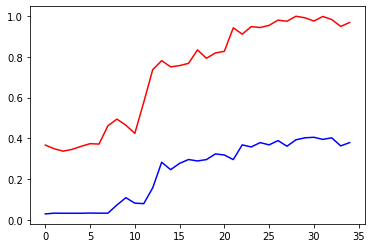

In [17]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

In [18]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
test= regr.predict(testX)


In [19]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.5048180544142529

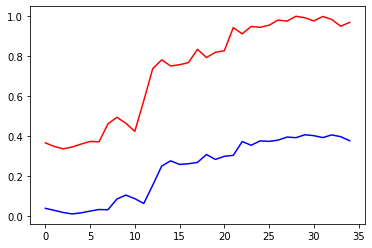

In [20]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()